In [6]:
import pandas as pd
import numpy as np
import sklearn.utils

In [7]:
control = pd.read_csv("control_data.csv")

In [8]:
experiment = pd.read_csv("experiment_data.csv")

In [9]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [10]:
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [11]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [12]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [13]:
control.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [14]:
experiment.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [15]:
control[control['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


In [16]:
experiment[experiment['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9359,789,NaN,NaN
24,"Tue, Nov 4",9427,743,NaN,NaN
25,"Wed, Nov 5",9633,808,NaN,NaN
26,"Thu, Nov 6",9842,831,NaN,NaN
27,"Fri, Nov 7",9272,767,NaN,NaN
28,"Sat, Nov 8",8969,760,NaN,NaN
29,"Sun, Nov 9",9697,850,NaN,NaN
30,"Mon, Nov 10",10445,851,NaN,NaN
31,"Tue, Nov 11",9931,831,NaN,NaN
32,"Wed, Nov 12",10042,802,NaN,NaN


In [17]:
data = pd.concat([control,experiment])

In [18]:
data.sample(5)

,Date,Pageviews,Clicks,Enrollments,Payments
21,"Sat, Nov 1",8460,681,156.0,93.0
1,"Sun, Oct 12",9288,785,116.0,91.0
5,"Thu, Oct 16",9500,788,129.0,61.0
35,"Sat, Nov 15",8630,743,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN


In [19]:
data['Row_id']= data.index

In [20]:
data['DOW']= data['Date'].str.slice(start=0,stop=3)
data.dropna(inplace=True)

In [21]:
data.dropna(inplace = True)

In [22]:
data['Experiment']= np.random.randint(2,size=len(data))

In [23]:
del data['Date'],data['Payments']

In [24]:
data= sklearn.utils.shuffle(data)

In [25]:
data.head()

,Pageviews,Clicks,Enrollments,Row_id,DOW,Experiment
1,9102,779,147.0,1,Sun,0
9,10496,860,153.0,9,Mon,0
19,9308,728,207.0,19,Thu,0
12,8176,642,122.0,12,Thu,0
12,8324,665,127.0,12,Thu,0


In [26]:
data=data.reindex(columns=['Row_id','Experiment','Pageviews','Clicks', 'DOW' , 'Enrollments'])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Enrollments'],data['Enrollments'], test_size=0.2)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
X_train['DOW']= le.fit_transform(X_train['DOW'])
X_test['DOW']=le.transform(X_test['DOW'])

In [31]:
X_train.head()

,Row_id,Experiment,Pageviews,Clicks,DOW
10,10,1,10551,864,5
19,19,0,9308,728,4
7,7,0,7434,632,2
7,7,1,7664,652,2
18,18,1,9327,739,6


In [32]:
X_test.head()

,Row_id,Experiment,Pageviews,Clicks,DOW
0,0,0,7723,687,2
15,15,0,8881,693,3
4,4,1,9793,832,6
6,6,0,9088,780,0
14,14,1,8669,669,2


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [36]:
import statsmodels.api as sm

In [37]:
X_train_refined = X_train.drop(columns=['Row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [38]:
X_test_refined = X_test.drop(columns=['Row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [39]:
calculate_metrics(y_test,y_preds)

RMSE Score: 26.15133964048288
R2_Squared: -0.6988587166928939
MAE Score: 22.36604519199839


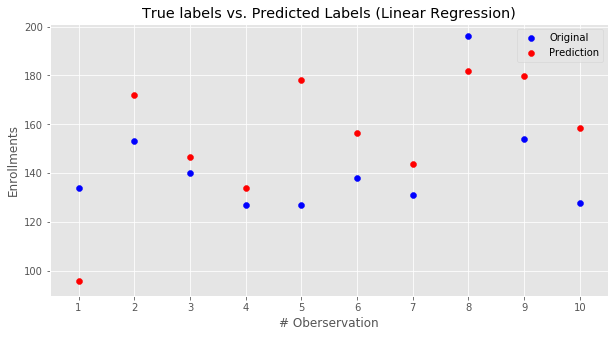

In [40]:
plot_preds(y_test,y_preds,'Linear Regression')

In [41]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,2.293932e-07
2,Clicks,2.464731e-05
3,DOW,5.473997e-01
0,Experiment,6.059048e-01


In [42]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              414.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                    4.58e-27
Time:                        10:31:07   Log-Likelihood:                         -163.28
No. Observations:                  36   AIC:                                      334.6
Df Residuals:                      32   BIC:                                      340.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Experiment     4.3648      8.377      0.521      0.606     -12.698      21.427
Pageviews      0.0703      0.011      6.540      0.000       0.048       0.092
Clicks        -0.6476      0.131     -4.926      0.000      -0.915      -0.380
DOW           -1.3071      2.149     -0.608      0.547      -5.685       3.071
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.814
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.636
Skew:                           0.258   Prob(JB):                        0.441
Kurtosis:                       2.092   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

In [45]:
calculate_metrics(y_test,y_preds)

RMSE Score: 30.960786917173348
R2_Squared: -1.381186224489796
MAE Score: 26.665714285714284


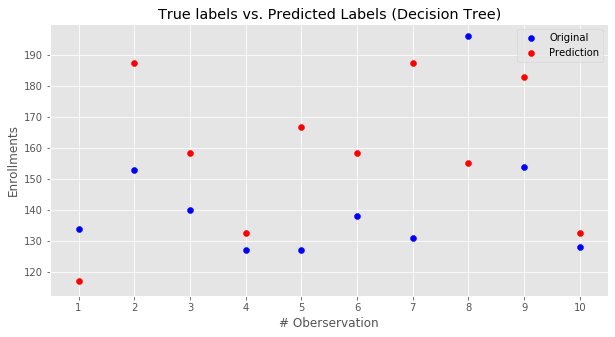

In [46]:
plot_preds(y_test,y_preds, 'Decision Tree')

In [47]:
import xgboost as xgb

In [48]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [49]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [ ]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

In [50]:
calculate_metrics(y_test, y_preds)

RMSE Score: 30.960786917173348
R2_Squared: -1.381186224489796
MAE Score: 26.665714285714284


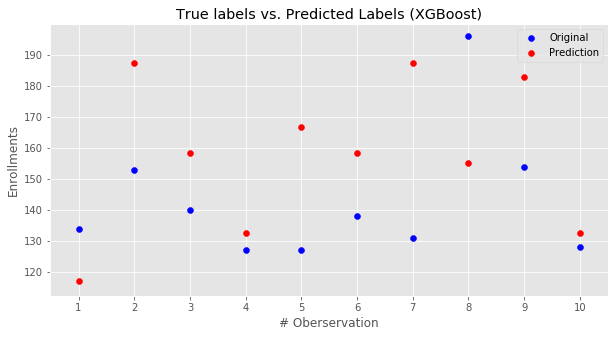

In [51]:
plot_preds(y_test, y_preds, 'XGBoost')